# Financial News Analysis - Exploratory Data Analysis (EDA)

This notebook provides an exploratory data analysis (EDA) of financial news articles. The analysis includes descriptive statistics, sentiment analysis, time series analysis, and publisher analysis. We will use the data provided in `raw_analyst_ratings.csv`.

## 1. Setup

First, let's set up the environment by importing necessary libraries and loading the data.


In [1]:
# Import necessary libraries and modules
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sys.path.insert(0, os.path.dirname(os.getcwd()))

from scripts.data_analysis import FinancialNewsEDA

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load the dataset
data_path = '../data/raw_analyst_ratings/raw_analyst_ratings.csv'
# output_path = '../data/cleaned_financial_news.csv'
analysis = FinancialNewsEDA(data_path)

# Load the data
analysis.load_data()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


### 2. Data Overview and Descriptive Analysis

To understand the dataset better, let start by examining key aspects such as missing values, duplicate records, data types, and descriptive statistics. This process helps to identify any potential issues that need addressing before further analysis.


- **Missing Values**:  helping to determine whether any data imputation or cleaning is needed.
- **Duplicates**: Detecting duplicate records ensures that the data used for analysis is unique and accurate.
- **Data Types**: Knowing the data types is essential for applying appropriate data manipulation techniques.
- **Descriptive Statistics**: Provides a broad statistical overview of the dataset, including mean, median, mode, standard deviation, and percentiles for numeric data, and counts and unique values for categorical data.




In [3]:
analysis.data_descriptive()

Missing values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


 Number of duplicates: 0


 Data types:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object


 Descriptive Statistics:
          Unnamed: 0                 headline  \
count   1.407328e+06                  1407328   
unique           NaN                   845770   
top              NaN  Benzinga's Top Upgrades   
freq             NaN                     5449   
mean    7.072454e+05                      NaN   
std     4.081009e+05                      NaN   
min     0.000000e+00                      NaN   
25%     3.538128e+05                      NaN   
50%     7.072395e+05                      NaN   
75%     1.060710e+06                      NaN   
max     1.413848e+06                      NaN   

                                                      url      publisher  \
c

### 3. Data Cleaning Process

Data cleaning is a crucial step to ensure the data is ready for analysis by removing unnecessary information, handling missing values, and ensuring consistency in data types.


- **Dropping Unnecessary Columns**: Some columns in the dataset might not contribute to the analysis. For instance, the `Unnamed: 0` column, often an artifact of saving and loading data, can be safely removed as it doesn’t provide any valuable information.

- **Handling Missing Values**: By dropping rows with missing values, we ensure that the data used for analysis is complete, reducing the risk of skewed results.
- **Converting Date Columns**: Converting date strings into `datetime` objects is critical for any time series analysis, allowing for more sophisticated and accurate time-based insights.

In [4]:
analysis.clean_data()

## 4. Statistics Analysis

In this section, I perform an analysis of the headlines in our dataset, focusing on the length of the headlines and the distribution of articles across different publishers.

- **Headline Length Analysis**: By analyzing the length of headlines, we can gain insights into the style and approach of different publishers.
- **Count of Articles per Publisher**: This analysis helps in identifying which publishers are more active or dominant in the dataset, providing a sense of the dataset's diversity.
- **Visualization**: The visualizations make it easier to grasp patterns and distributions, offering a more intuitive understanding of the data.




In [5]:
analysis.get_article_length()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [6]:
analysis.count_articles_per_publisher()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64

In [7]:
analysis.analyze_publication_dates()

publication_date
2020-03-12    2739
2020-02-28    1620
2020-03-19    1594
2020-02-27    1567
2020-03-06    1428
              ... 
2016-03-19       1
2011-09-03       1
2011-10-15       1
2009-07-17       1
2016-06-18       1
Name: count, Length: 3955, dtype: int64

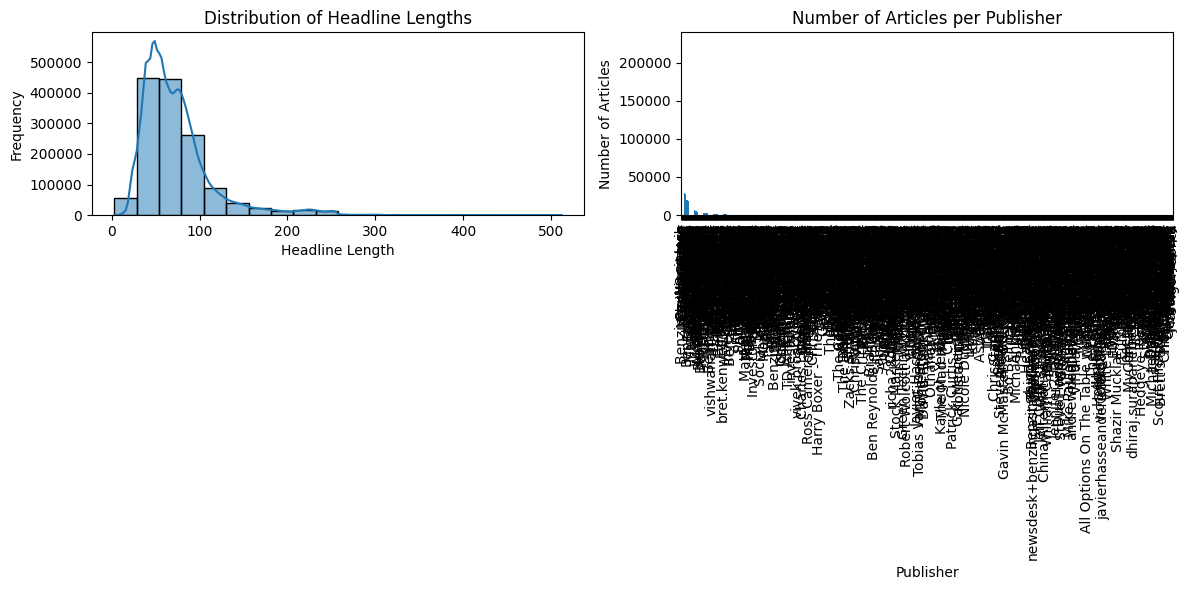

In [8]:
analysis.plot_article_statistics()

## 5. Sentiment Analysis

Next, let perform sentiment analysis on the headlines to determine the general sentiment (positive, negative, neutral) associated with each article.


In [9]:
analysis.sentiment_analysis()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...


count    1.407328e+06
mean     6.650410e-02
std      2.714077e-01
min     -9.578000e-01
25%      0.000000e+00
50%      0.000000e+00
75%      2.023000e-01
max      9.741000e-01
Name: sentiment, dtype: float64

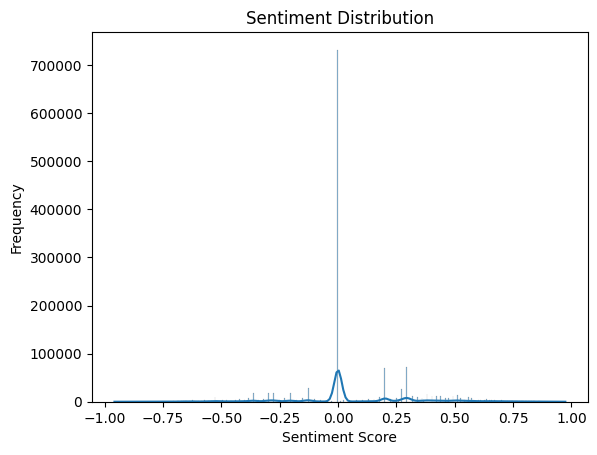

In [11]:
analysis.plot_sentiment_distribution()